<a href="https://colab.research.google.com/github/ABHILASHCHAUDHARY/LSTM-Stock-price-prediction/blob/main/LSTM_StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use the LSTM Algo to pridict the stock prices of a particular stock, we will Implement recurrent nueral network to use one's output as the next's input

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing the Training data set for Google

data_train = pd.read_csv('Google_Stock_Price_Train.csv')
data_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set = data_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

Feature scaling - scale down the values in the same range (like from 0 to 1) by MinMaxscaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

Creating a data structure with 60 timestamps and 1 output

In [ ]:
x_train = []
y_train =[]

for i in range(60, len(training_set_scaled)):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape


(1198, 60)

In [ ]:

y_train.shape

(1198,)

for creating RNN we have to reshape the data into the correct shape - which we will do by using Keras we make it into 3D



In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [ ]:
# Intializing the RNN
regressor = Sequential()

#adding first LSTM layer adn Dropout regularization

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))


#adding second LSTM Layer
regressor.add(LSTM(units=50, return_sequences = True ))
regressor.add(Dropout(0.2))

#adding Third LSTM Layer
regressor.add(LSTM(units=50, return_sequences = True ))
regressor.add(Dropout(0.2))

#adding fourth LSTM Layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#adding output layer
regressor.add(Dense(units =1))

#compling the RNN , mean square error - will help you find global minima quickly
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#fitting the RNN to the Training set
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 104ms/step - loss: 0.0346
Epoch 2/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 7s 191ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 8s 221ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0040
Epoch 13/100

Making the prediction and visualizing the results

In [ ]:
#getting the real stock price of 2017

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test

In [ ]:
# getting it predicted
dataset_total = pd.concat((data_train['Open'], dataset_test['Open']), axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
predicted_Stock_price = regressor.predict(x_test)
predicted_Stock_price = sc.inverse_transform(predicted_Stock_price)
predicted_Stock_price

1/1 [==============================] - 0s 53ms/step


array([[784.91376],
       [782.1422 ],
       [783.3558 ],
       [784.8791 ],
       [788.32715],
       [794.321  ],
       [798.8291 ],
       [799.64526],
       [799.5425 ],
       [799.57544],
       [799.8044 ],
       [799.85913],
       [799.84564],
       [800.58563],
       [801.54095],
       [806.9777 ],
       [813.94055],
       [820.632  ],
       [822.9622 ],
       [816.5206 ]], dtype=float32)

PLotting the Graph between Actual value and Predicted value

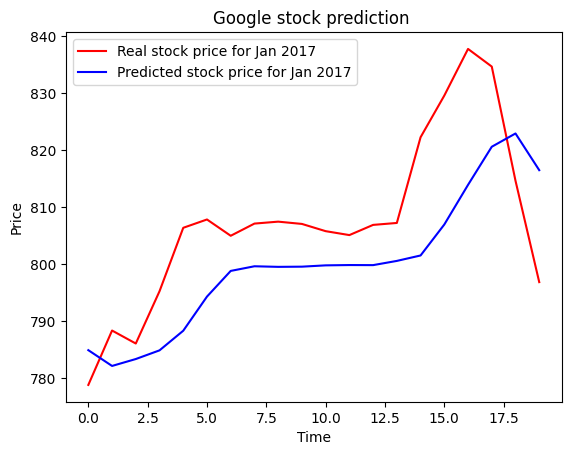

In [ ]:
real_Stock_price = dataset_test.iloc[:, 1:2].values

#visualizing
plt.plot(real_Stock_price, color ='red', label='Real stock price for Jan 2017')
plt.plot(predicted_Stock_price, color ='blue', label='Predicted stock price for Jan 2017')
plt.title("Google stock prediction ")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()